In [40]:
import os
import numpy as np
import xarray as xr
import pandas as pd
import seaborn as sns
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import sys
sys.path.append(os.path.abspath(".."))
from function import ART_statistic as ART_sta

## COMPARISON BETWEEN ENSEMBLES

In [41]:
ENSEMBLE_SAT = 'ALL'
# ENSEMBLE_SAT = 'NOGSMaP'

In [42]:
IMERG_RE_raw, IMERG_RE_down = ART_sta.extract_all_quantiles('IMERG')

In [43]:
ENSEMBLE_RE_raw, ENSEMBLE_RE_down = ART_sta.extract_all_quantiles(f'ENSEMBLE_{ENSEMBLE_SAT}_mean')
ENSEMBLE_RE_median_raw, ENSEMBLE_RE_median_down = ART_sta.extract_all_quantiles(f'ENSEMBLE_{ENSEMBLE_SAT}_median')
ENSEMBLE_RE_weighted_raw, ENSEMBLE_RE_weighted_down = ART_sta.extract_all_quantiles(f'ENSEMBLE_{ENSEMBLE_SAT}_weighted')
ENSEMBLE_RE_trimean_raw, ENSEMBLE_RE_trimean_down = ART_sta.extract_all_quantiles(f'ENSEMBLE_{ENSEMBLE_SAT}_trimean')

In [44]:
colors = ['royalblue','r', 'g', 'c', 'y', 'purple', 'orange', 'cyan']

In [45]:
print(f'Mean    : {np.nanstd(ENSEMBLE_RE_down)}')
print(f'Median  : {np.nanstd(ENSEMBLE_RE_median_down)}')
print(f'Weighted: {np.nanstd(ENSEMBLE_RE_weighted_down)}')
print(f'Trimean : {np.nanstd(ENSEMBLE_RE_trimean_down)}')

Mean    : 0.24872307915233408
Median  : 0.19414653274988647
Weighted: 0.19092420903294058
Trimean : 0.19272193630938017


../figures/Article_down/Products_DOWN_comparison.png


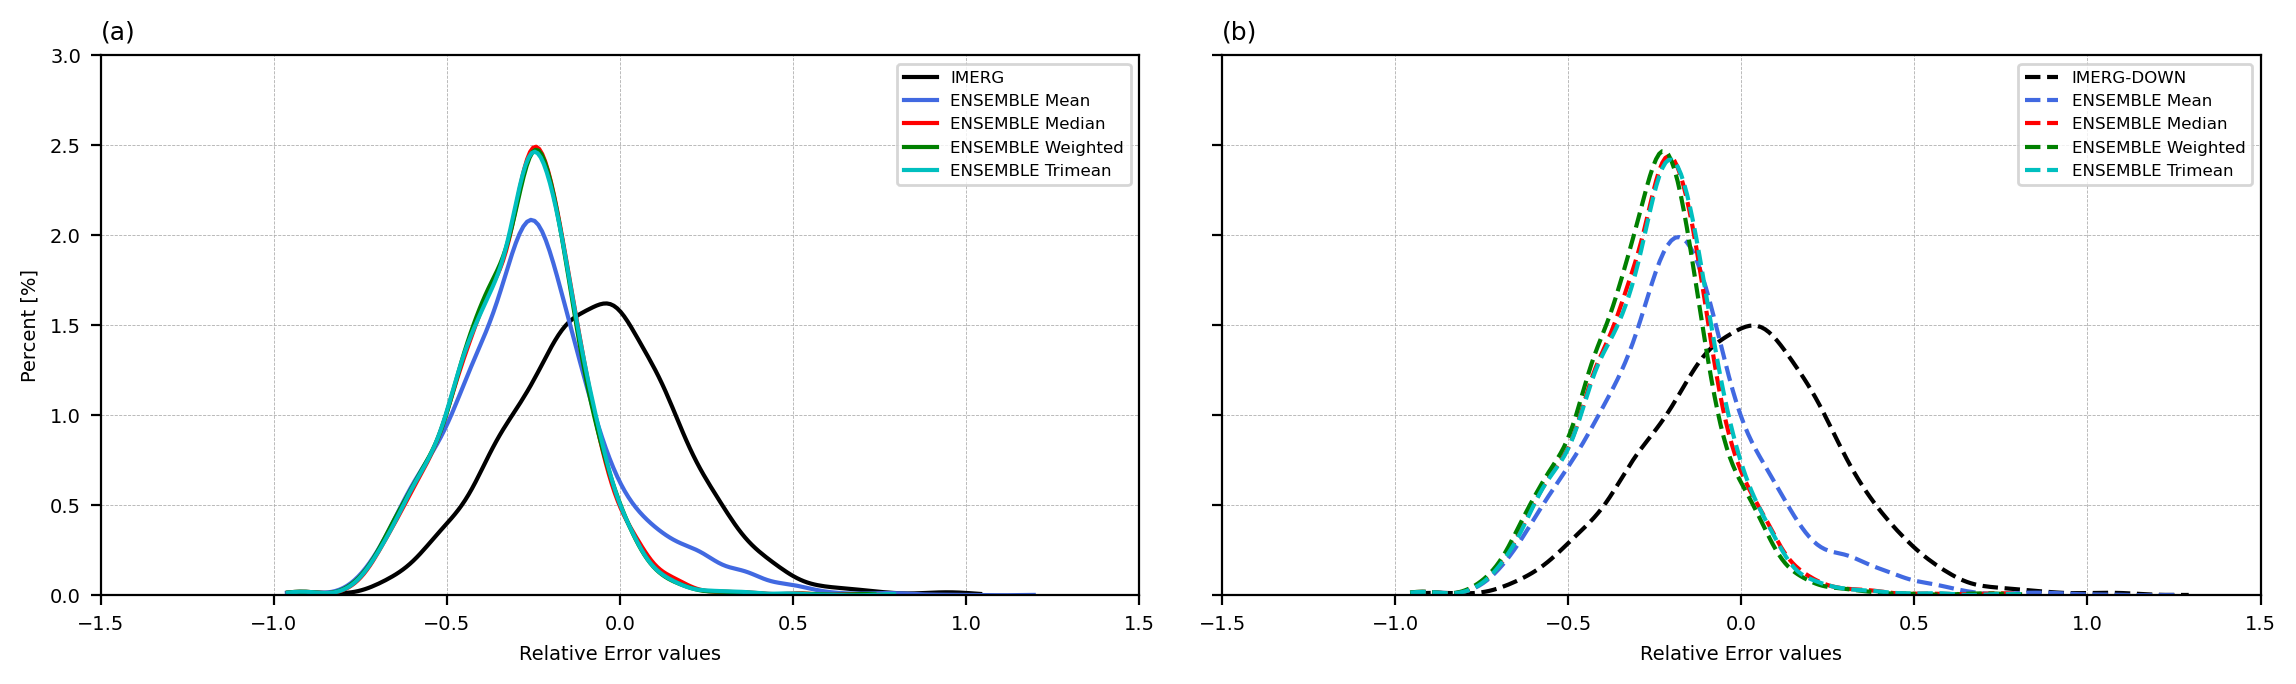

In [46]:
fig = plt.figure(figsize=(12,3),dpi=200)
gs = gridspec.GridSpec(1,2)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(IMERG_RE_raw,color='k',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG',
            clip=(np.nanmin(np.array(IMERG_RE_raw)), np.nanmax(np.array(IMERG_RE_raw))))

sns.kdeplot(ENSEMBLE_RE_raw,color=colors[0],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE Mean',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_raw)), np.nanmax(np.array(ENSEMBLE_RE_raw))))


sns.kdeplot(ENSEMBLE_RE_median_raw,color=colors[1],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE Median',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_median_raw)), np.nanmax(np.array(ENSEMBLE_RE_median_raw))))


sns.kdeplot(ENSEMBLE_RE_weighted_raw,color=colors[2],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE Weighted',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_weighted_raw)), np.nanmax(np.array(ENSEMBLE_RE_weighted_raw))))


sns.kdeplot(ENSEMBLE_RE_trimean_raw,color=colors[3],cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE Trimean',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_trimean_raw)), np.nanmax(np.array(ENSEMBLE_RE_trimean_raw))))


ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,3)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(a)',fontsize=9, loc='left')

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 1])

sns.kdeplot(IMERG_RE_down,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG-DOWN',
            clip=(np.nanmin(np.array(IMERG_RE_down)), np.nanmax(np.array(IMERG_RE_down))))

sns.kdeplot(ENSEMBLE_RE_down,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE Mean',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_down)), np.nanmax(np.array(ENSEMBLE_RE_down))))


sns.kdeplot(ENSEMBLE_RE_median_down,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE Median',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_median_down)), np.nanmax(np.array(ENSEMBLE_RE_median_down))))


sns.kdeplot(ENSEMBLE_RE_weighted_down,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE Weighted',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_weighted_down)), np.nanmax(np.array(ENSEMBLE_RE_weighted_down))))


sns.kdeplot(ENSEMBLE_RE_trimean_down,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE Trimean',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_trimean_down)), np.nanmax(np.array(ENSEMBLE_RE_trimean_down))))

ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')

ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,3)
ax1.set_yticklabels('')
ax1.set_ylabel('')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(b)',fontsize=9, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.15)

salida = '../figures/Article_down/Products_DOWN_comparison.png'
print(salida)
# plt.savefig(salida,transparent = False,bbox_inches ='tight',pad_inches = 0.1, facecolor=None)

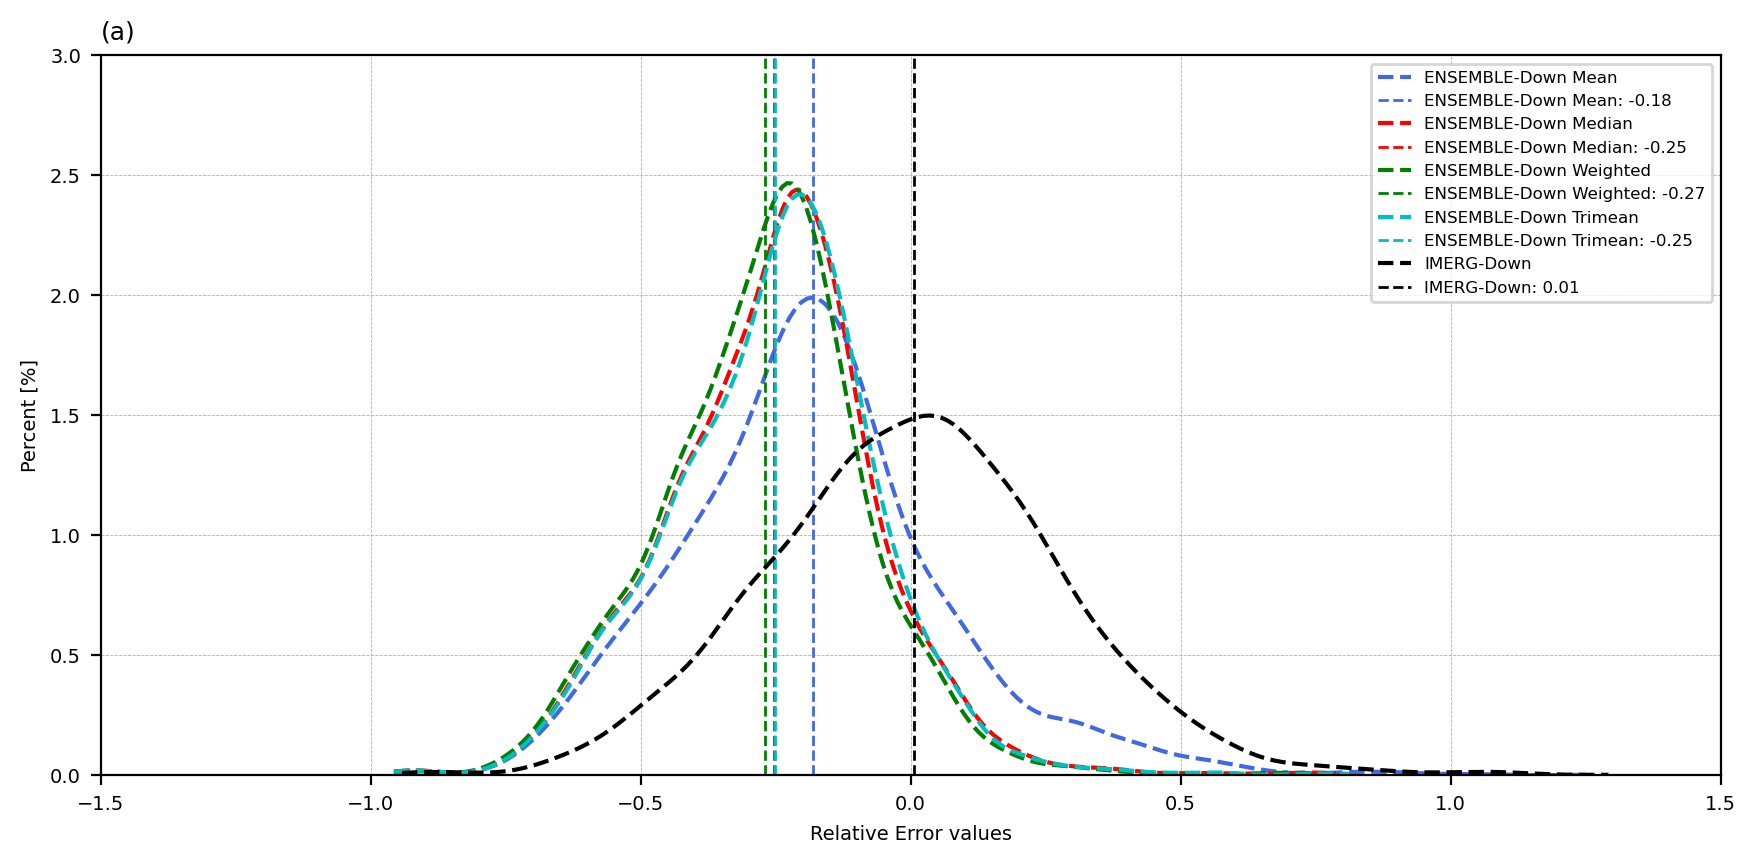

In [47]:
fig = plt.figure(figsize=(9,4),dpi=200)
gs = gridspec.GridSpec(1,1)

# =========================================================================================================================
ax1 = plt.subplot(gs[0, 0])

sns.kdeplot(ENSEMBLE_RE_down,color=colors[0], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-Down Mean',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_down)), np.nanmax(np.array(ENSEMBLE_RE_down))))
ax1.axvline(np.nanmean(ENSEMBLE_RE_down),color=colors[0],linestyle='--',linewidth=1, label=f'ENSEMBLE-Down Mean: {np.round(np.nanmean(ENSEMBLE_RE_down),2)}')


sns.kdeplot(ENSEMBLE_RE_median_down,color=colors[1], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-Down Median',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_median_down)), np.nanmax(np.array(ENSEMBLE_RE_median_down))))
ax1.axvline(np.nanmean(ENSEMBLE_RE_median_down),color=colors[1],linestyle='--',linewidth=1, label=f'ENSEMBLE-Down Median: {np.round(np.nanmean(ENSEMBLE_RE_median_down),2)}')


sns.kdeplot(ENSEMBLE_RE_weighted_down,color=colors[2], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-Down Weighted',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_weighted_down)), np.nanmax(np.array(ENSEMBLE_RE_weighted_down))))
ax1.axvline(np.nanmean(ENSEMBLE_RE_weighted_down),color=colors[2],linestyle='--',linewidth=1, label=f'ENSEMBLE-Down Weighted: {np.round(np.nanmean(ENSEMBLE_RE_weighted_down),2)}')


sns.kdeplot(ENSEMBLE_RE_trimean_down,color=colors[3], linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'ENSEMBLE-Down Trimean',
            clip=(np.nanmin(np.array(ENSEMBLE_RE_trimean_down)), np.nanmax(np.array(ENSEMBLE_RE_trimean_down))))
ax1.axvline(np.nanmean(ENSEMBLE_RE_trimean_down),color=colors[3],linestyle='--',linewidth=1, label=f'ENSEMBLE-Down Trimean: {np.round(np.nanmean(ENSEMBLE_RE_trimean_down),2)}')

sns.kdeplot(IMERG_RE_down,color='k', linestyle='--',cumulative=False,fill=False,multiple="stack",ax=ax1,label=f'IMERG-Down',
            clip=(np.nanmin(np.array(IMERG_RE_down)), np.nanmax(np.array(IMERG_RE_down))))
ax1.axvline(np.nanmean(IMERG_RE_down),color='k',linestyle='--',linewidth=1, label=f'IMERG-Down: {np.round(np.nanmean(IMERG_RE_down),2)}')

ax1.set_ylabel('Percent [%]',fontsize=7)
ax1.set_xlabel('Relative Error values',fontsize=7)
ax1.legend(fontsize=6, loc=0, ncol=1)
ax1.grid(linewidth=0.3, linestyle='--')
ax1.set_xlim(-1.5,1.5)
ax1.set_ylim(0,3)
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_title(f'(a)',fontsize=9, loc='left')

# ============================================================================================================================
plt.subplots_adjust(left=0.05, bottom=0.05, right=0.95, top=0.95, wspace=0.08, hspace=0.15)
